# Analyzing My Amazon Spending

## Objective

The goal for this project is to analyze and understand my spending habits on Amazon. 

Possible questions to be answered:

- Figure out the total amount of money I've spent on Amazon, ever
- Find my most, least expensive order and average order totals
- Figure out how much I’ve paid in taxes, and my effective sales tax rate on Amazon
- Visualize my spending habits 

## The Data

Amazon allows you to download reports on orders you've made dating all the way back to 2006. To get the data, I used this [link](https://www.amazon.com/gp/b2b/reports?ref_=ya_d_l_order_reports&). For this analysis, I downloaded only the **Orders and Shipments** report. 

**Note**: for privacy purposes I deleted rows in the CSV that contained personal information.

## Open Data

Let's start by opening the dataset and explore the data.



In [51]:
import pandas as pd

df = pd.read_csv('amazon_orders.csv')
df

,Order Date,Order ID,Website,Shipment Date,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged
0,4/28/14,105-3308790-5933007,Amazon.com,4/29/14,Shipped,UPS(1Z602E8EYW01207925),$13.05,$5.52,$0.00,$0.00,$0.00,$18.57
1,12/25/14,103-9751450-7316265,Amazon.com,12/27/14,Shipped,USPS(9341989877958102116176),$20.48,$0.00,$1.80,$0.00,$1.80,$22.28
2,12/25/14,103-9184404-4242661,Amazon.com,12/26/14,Shipped,USPS(9361289877910104287082),$24.77,$0.00,$2.18,$0.00,$2.18,$26.95
3,4/6/15,110-9009777-7021844,Amazon.com,4/7/15,Shipped,UPS(1ZF533440154284158),$29.61,$19.98,$4.37,$0.00,$4.37,$53.96
4,10/29/15,114-1716231-6671449,Amazon.com,10/30/15,Shipped,USPS(9449010898313018682941),$7.19,$3.99,$0.00,$0.00,$0.00,$11.18
...,...,...,...,...,...,...,...,...,...,...,...,...
69,1/10/21,112-0102920-1845813,Amazon.com,1/11/21,Shipped,USPS(9341989674090177236085),$9.89,$0.00,$0.91,$0.00,$0.91,$10.80
70,1/10/21,112-0102920-1845813,Amazon.com,1/11/21,Shipped,AMZN_US(TBA131597643604),$13.94,$0.00,$1.28,$0.00,$1.28,$15.22
71,1/16/21,112-3954640-8716215,Amazon.com,1/17/21,Shipped,AMZN_US(TBA138824580104),$15.27,$0.00,$1.40,$0.00,$1.40,$16.67
72,1/16/21,112-3954640-8716215,Amazon.com,1/17/21,Shipped,AMZN_US(TBA138077335004),$62.64,$0.00,$5.76,$0.00,$5.76,$68.40


I can see that the dimensions of my DataFrame are 73 row and 12 columns.

## Cleaning the Data

A quick scan of the data shows that all of the prices in the dataset are stored as **strings**, rather than as numbers. 

I know I'll need the Total Charged, Tax Charged and Shipping Charge data for my analysis, so let's remove the dollar ($) sign and convert the data type to a **float** for these rows.

### Total Charged

In [52]:
df["Total Charged"] = df["Total Charged"].str.replace('$','').astype(float)

In [53]:
df["Total Charged"]

0     18.57
1     22.28
2     26.95
3     53.96
4     11.18
      ...  
69    10.80
70    15.22
71    16.67
72    68.40
73     7.07
Name: Total Charged, Length: 74, dtype: float64

### Tax Charged

In [54]:
df["Tax Charged"] = df["Tax Charged"].str.replace('$','').astype(float)

In [55]:
df["Tax Charged"]

0     0.00
1     1.80
2     2.18
3     4.37
4     0.00
      ... 
69    0.91
70    1.28
71    1.40
72    5.76
73    0.60
Name: Tax Charged, Length: 74, dtype: float64

### Shipping Charge

In [56]:
df["Shipping Charge"] = df["Shipping Charge"].str.replace('$','').astype(float)

In [58]:
df["Shipping Charge"]

0      5.52
1      0.00
2      0.00
3     19.98
4      3.99
      ...  
69     0.00
70     0.00
71     0.00
72     0.00
73     0.00
Name: Shipping Charge, Length: 74, dtype: float64

## Dates 

To calculate my spending over time, we need to convert them to a **datetime** data type, so that the computer can recognize them as dates.

In [74]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order Date,Order ID,Website,Shipment Date,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged
0,2014-04-28,105-3308790-5933007,Amazon.com,4/29/14,Shipped,UPS(1Z602E8EYW01207925),$13.05,5.52,$0.00,$0.00,0.00,18.57
1,2014-12-25,103-9751450-7316265,Amazon.com,12/27/14,Shipped,USPS(9341989877958102116176),$20.48,0.00,$1.80,$0.00,1.80,22.28
2,2014-12-25,103-9184404-4242661,Amazon.com,12/26/14,Shipped,USPS(9361289877910104287082),$24.77,0.00,$2.18,$0.00,2.18,26.95
3,2015-04-06,110-9009777-7021844,Amazon.com,4/7/15,Shipped,UPS(1ZF533440154284158),$29.61,19.98,$4.37,$0.00,4.37,53.96
4,2015-10-29,114-1716231-6671449,Amazon.com,10/30/15,Shipped,USPS(9449010898313018682941),$7.19,3.99,$0.00,$0.00,0.00,11.18


From that one row, we can see that the date formatting has changed from 4/28/14 to 2014-04-28.

# Data Analysis

Now I'll use some basic functions to quickly find the total amount I spent, along with the average amount per purchase, my largest and my smallest purchase. 

### Total Spend

In [69]:
df["Total Charged"].sum()

4432.639999999999

There it is: $4432.63. That’s how much money I have spent on Amazon. 

### Average Spend

In [62]:
df["Total Charged"].mean()

59.90054054054053

### Largest Purchase

In [63]:
df["Total Charged"].max()

528.53

### Smallest Purchase

In [65]:
df["Total Charged"].min()

0.0

My smallest purchase is 0.0, which happens when you start a free trial of Amazon Prime when ordering another item. 

## How Much Did I Pay in Sales Tax?


In [71]:
df["Tax Charged"].sum()

368.1

About \\$368.10 of the total money I spent on Amazon went towards taxes. 

The tax rate on different items varies. Let's figure out the overall tax rate:

### Tax Rate 

In [68]:
df["Tax Charged"].sum() / df["Total Charged"].sum()

0.08304306237366448

During this time period, I paid an overall effective sales tax rate of about 8.3%.

## How Much Did I Pay For Shipping? 

I thought it would be interesting to see how much I spent on shipping. Amazon offers free shipping with an Amazon Prime membership, which I have subscribed to on and off throughout the years.

In [72]:
df["Shipping Charge"].sum()

77.93

With a total of 4,432.63 in purchases on Amazon, I have spent a total of 77.93 on shipping. 

# Analyzing Amazon Spending Over Time

Now, let's quickly display a chart with matplotlib.

In [75]:
%matplotlib inline

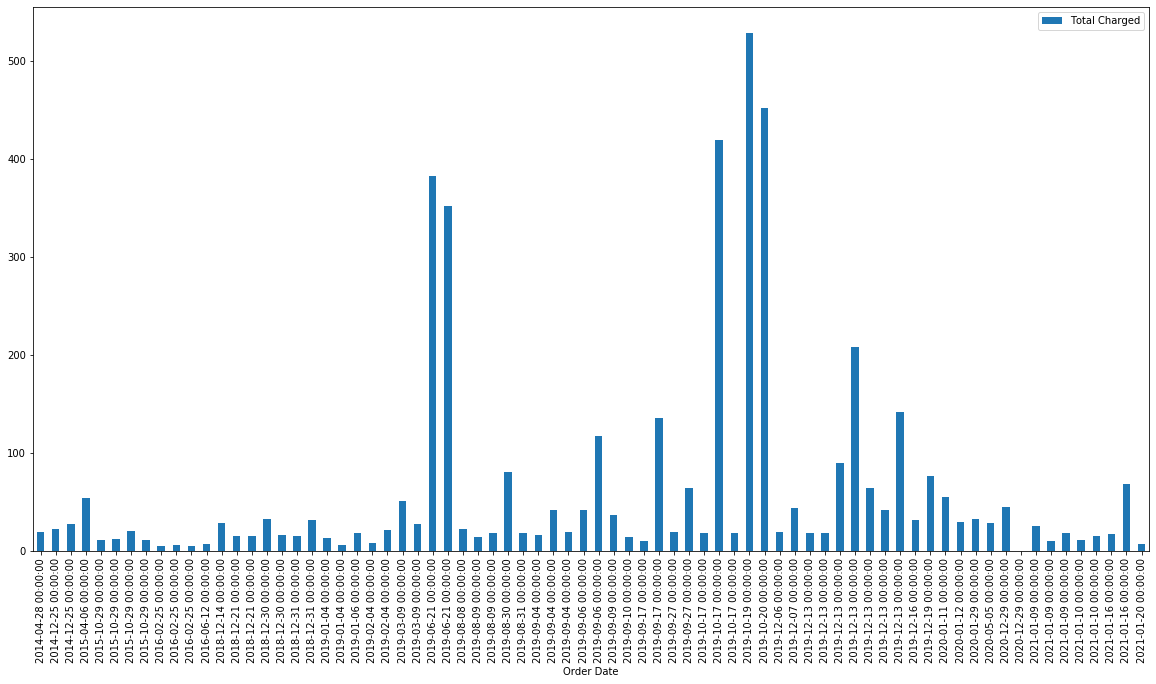

In [77]:
df.plot.bar(x='Order Date', y='Total Charged', rot=90, figsize=(20,10))

Looks good, but I spot a problem: when multiple orders were placed on the same day, each order is getting a separate bar in the bar chart. 

That’s not really what I was trying to visualize. I want to see how much was spent each day. Each bar should represent a day, not a single order, so if there was more than one order on that day, the totals charged for those orders should be added together.

Let's fix this.

## Grouping Our Data

I'll break this down into two parts: 

1. Group our data by 'Order Date', so that all the orders that share the same date are counted in a single row

2. Get the sum of the prices paid in 'Total Charged' column for each date and make it the value for 'Total Charged' in the relevant date’s row 


I'll assign the result of that, which will be a pandas Series, to a new variable. I'll call it **daily_orders**.

Here’s what it looks like all together:

In [80]:
daily_orders = df.groupby('Order Date').sum()["Total Charged"]
daily_orders.head()

Order Date
2014-04-28    18.57
2014-12-25    49.23
2015-04-06    53.96
2015-10-29    54.35
2016-02-25    13.93
Name: Total Charged, dtype: float64

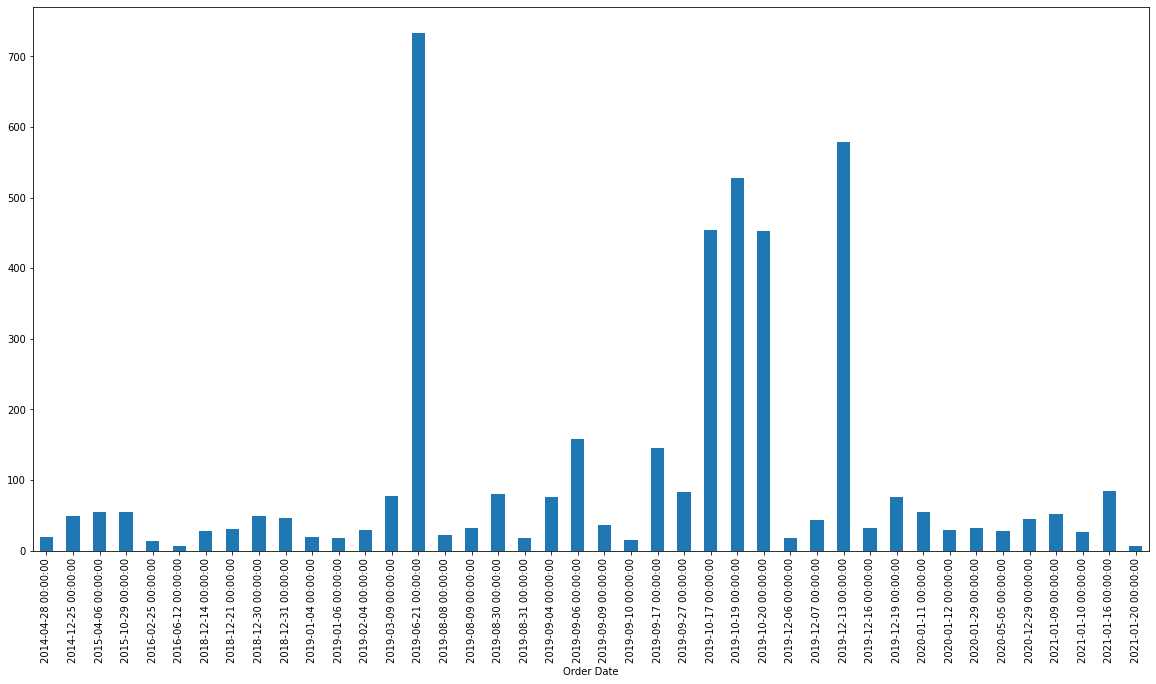

In [81]:
daily_orders.plot.bar(figsize=(20,10))

This chart shows us something my previous analysis hasn’t: although the biggest single order was just over \\$528, there was a single day in June where several orders totaled up to well over \\$700.

# Conclusion